# PCA, IncrementalPCA, KernelPCA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [3]:
dt_heart = pd.read_csv("heart.csv")

In [8]:
dt_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dt_features = dt_heart.drop(["target"], axis=1)
dt_features = StandardScaler().fit_transform(dt_features)

dt_target = dt_heart["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

# KernelPCA

In [6]:
kpca = KernelPCA(n_components=4, kernel='poly')
kpca.fit(X_train)
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

In [7]:
logistic = LogisticRegression(solver="lbfgs")

In [8]:
logistic.fit(dt_train, y_train)
logistic.score(dt_test, y_test)

0.7987012987012987

# PCA, IncrementalPCA

In [20]:
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

In [21]:
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

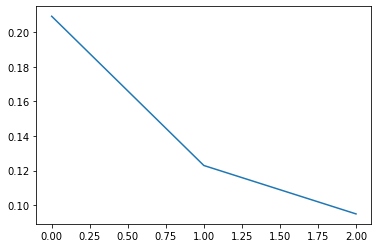

In [26]:
num_pc = range(len(pca.explained_variance_))
var_pc = pca.explained_variance_ratio_

plt.plot(num_pc, var_pc)
plt.show()

In [31]:
logistic = LogisticRegression(solver="lbfgs")

In [34]:
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
logistic.score(dt_test, y_test)

0.7857142857142857

In [35]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
logistic.score(dt_test, y_test)

0.8051948051948052